In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("compIA.xlsx")
data

,Ciment,Laitier,cendre volante,Eau,Superplastifiant,Gravier,Sable,Age,RC
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7,30.957472
...,...,...,...,...,...,...,...,...,...
1797,276.40,116.0,90.30,179.60,8.90,870.1,768.30,28,44.280000
1798,322.20,0.0,115.60,196.00,10.40,817.9,813.40,28,31.180000
1799,148.50,139.4,108.60,192.70,6.10,892.4,780.00,28,23.700000
1800,159.10,186.7,0.00,175.60,11.30,989.6,788.90,28,32.770000


Colonne Target : RC Résistance compréssive

Les autres colonnes : chaque colonnes represente un ingrédient d'un mixage du ciment

# Prétraitement

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ciment            1802 non-null   float64
 1   Laitier           1802 non-null   float64
 2   cendre volante    1802 non-null   float64
 3   Eau               1802 non-null   float64
 4   Superplastifiant  1802 non-null   float64
 5   Gravier           1802 non-null   float64
 6   Sable             1802 non-null   float64
 7   Age               1802 non-null   int64  
 8   RC                1802 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 126.8 KB


In [4]:
data.Age = data.Age.astype(float)

On remarque l'abscence des nulles, et le type de la colonne Age qui est différent des autres colonnes, alors on change son type

In [5]:
data.isnull().sum()

Ciment              0
Laitier             0
cendre volante      0
Eau                 0
Superplastifiant    0
Gravier             0
Sable               0
Age                 0
RC                  0
dtype: int64

In [6]:
data.describe()

,Ciment,Laitier,cendre volante,Eau,Superplastifiant,Gravier,Sable,Age,RC
count,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000
mean,280.977092,75.009834,53.551299,181.907575,6.117345,972.336226,772.739883,45.375694,35.777791
std,104.565600,86.779991,63.812398,21.164402,5.917792,77.446913,79.992799,62.000119,16.740474
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,165.000000,0.000000,932.000000,728.225000,7.000000,23.692797
50%,273.000000,24.000000,0.000000,185.700000,6.200000,968.000000,778.500000,28.000000,34.202452
75%,350.000000,144.150000,118.270000,192.850000,10.100000,1028.400000,822.200000,56.000000,46.222471
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
data.duplicated().value_counts()

False    1764
True       38
Name: count, dtype: int64

In [8]:
data[data.duplicated()]

,Ciment,Laitier,cendre volante,Eau,Superplastifiant,Gravier,Sable,Age,RC
257,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56.0,64.300532
318,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7.0,49.201007
320,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7.0,49.201007
396,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56.0,64.300532
407,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7.0,55.895819
470,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28.0,71.298713
523,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91.0,79.296635
559,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56.0,77.297154
605,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56.0,77.297154
642,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3.0,35.301171


On a des doublons, il ne faut guardez qu'une seule occurence de chaque doublon

In [9]:
data = data.drop_duplicates(keep='first')

In [10]:
data.duplicated().value_counts()

False    1764
Name: count, dtype: int64

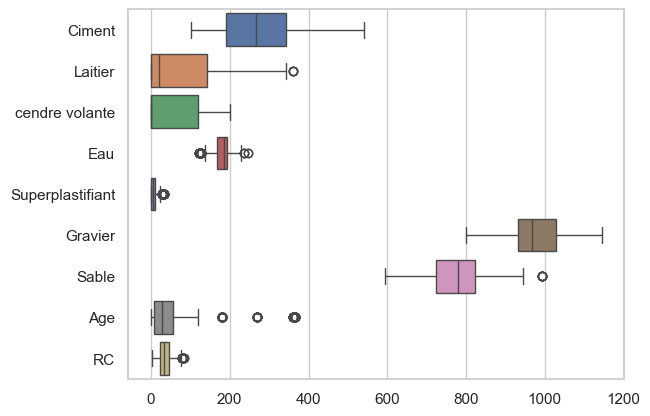

In [11]:
sns.set(style='whitegrid')
ax=sns.boxplot(data=data,orient="h")

Valeurs abbérantes dans les colonnes : Laitier, Eau, Superplastifiant, Sable, Age, RC

puisque'on a des colonnes qui ont des valeurs abbérantes et puisque ces valeurs sont des ingrédiants qui vont influencer la résultat de la colonne target on ne peut que les supprimers

In [12]:
def delete_abnormal_values(df,col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    q2 = (q1+q3)/2
    irq = q3-q1

    inf = q1-1.5*irq
    sup = q3+1.5*irq
    
    df.drop(df[df[col_name]<inf].index, inplace=True)
    df.drop(df[df[col_name]>sup].index, inplace=True)
    
    return inf,sup

on calcul les quantiles q1, q2 et q3 pour qu'on puisse calculer les valeurs inf et sup de colonne donnée puis on supprime les outiliers

Remove sup/inf values

In [13]:
inf_eau,sup_eau=delete_abnormal_values(data,"Eau")
inf_laitier,sup_laitier=delete_abnormal_values(data,"Laitier")
inf_supPlast,sup_supPlast=delete_abnormal_values(data,"Superplastifiant")
inf_age,sup_age=delete_abnormal_values(data,"Age")
inf_rc,sup_rc=delete_abnormal_values(data,"RC")
inf_sable,sup_sable=delete_abnormal_values(data,"Sable")

In [14]:
data.shape

(1569, 9)

Puisqu'on a une base de petite taille on ne peut pas faire plus qu'une itération de traitement de valeurs abbérantes

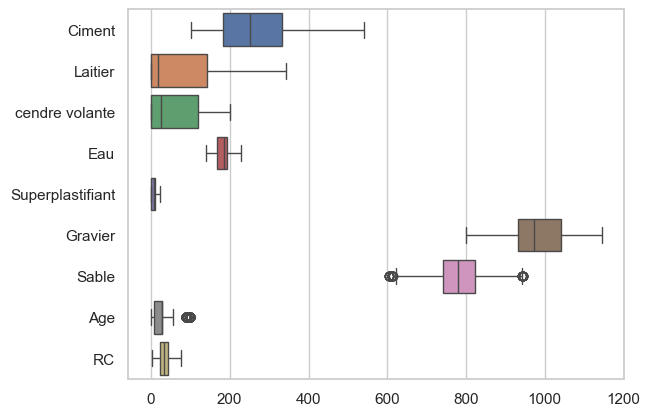

In [15]:
sns.set(style="whitegrid")
ax = sns.boxplot(data=data,orient='h')

On observe qu'on a encore des valeurs abbérantes, c'est du à le fait qu'on a effectué une seule itération de suppression des valeurs outliers ce qui a influencé les valeurs inf et sup de chaque colonne

In [16]:
data.shape

(1569, 9)

<Axes: >

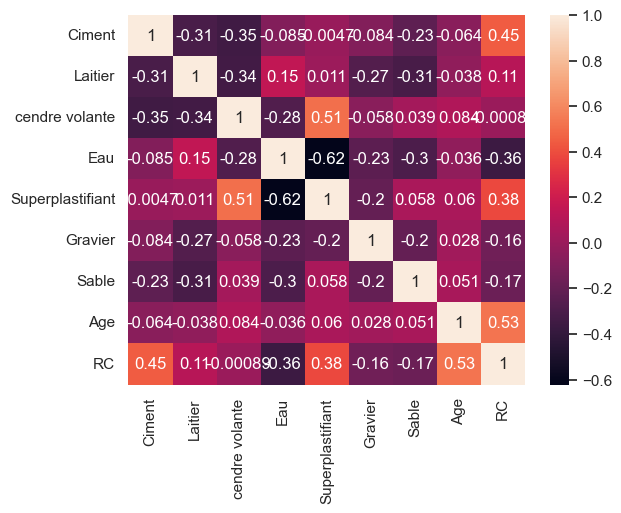

In [17]:
correlation = data.corr(method="pearson")
sns.heatmap(correlation, annot=True)

MIGHT delete one of the coorrelated features later if that proves fruitful

In [18]:
x = data.iloc[:,:-1].values
x
x_columns = data.iloc[:,:-1].columns

In [19]:
y = data.iloc[:,-1].values
y

array([31.87516496, 36.93522932, 36.63875464, ..., 23.7       ,
       32.77      , 32.4       ])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

# Répartition de la base en test et train

In [21]:
x_train , x_test , y_train , y_test = train_test_split( x , y, test_size = 0.2, random_state=0)

In [22]:
std_scaler = preprocessing.StandardScaler()
x_train_sc = std_scaler.fit_transform (x_train)
x_test_sc = std_scaler.transform (x_test)

# Modélisation

# Linear Regression

In [23]:
regressor1 = LinearRegression()
regressor1.fit(x_train_sc,y_train)
regressor1.intercept_
y_pred_lin_reg = regressor1.predict(x_test_sc)

In [24]:
lin_reg_coef = regressor1.coef_
lin_reg_intercept = regressor1.intercept_
lin_reg_mae = mean_absolute_error(y_test, y_pred_lin_reg) # distance absolue entre valeur prédite et la valeur réelle : le plus bas est le plus meilleur
lin_reg_r2 = r2_score(y_test, y_pred_lin_reg) # variance de target par rapport au variable à predire : le plus haut est le meilleur (entre 0 et 1)
lin_reg_mse = mean_squared_error(y_test,y_pred_lin_reg) # distance carrée entre valeur prédite et la valeur réelle : le plus bas est le plus meilleur
lin_reg_rmse = math.sqrt(lin_reg_mse)

In [25]:
print("Root Mean Squared Error:", lin_reg_mse)
print("Mean Absolute Error:", lin_reg_mae)
print("R2 Score:", lin_reg_r2)
print("Mean Squared Error : ",lin_reg_mse)
print("coefficients optimales: ",lin_reg_coef)
print("regression intercept: ",lin_reg_intercept)

Root Mean Squared Error: 64.05577156932844
Mean Absolute Error: 6.2492194575835285
R2 Score: 0.7498842229057932
Mean Squared Error :  64.05577156932844
coefficients optimales:  [10.09453425  6.32785117  3.10308736 -4.5255352   0.90286594 -1.04752106
 -0.583366    8.98335083]
regression intercept:  33.90078222692089


Text(0.5, 1.0, "Prédiction du modèle 'linear regression'")

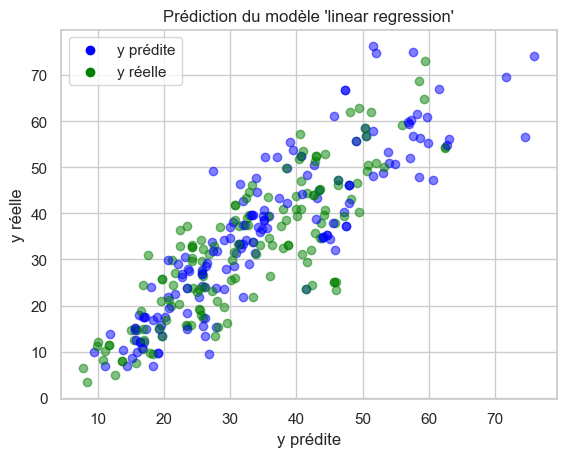

In [26]:
colors = ['blue', 'green'] * (len(y_test) // 2 + 1)
for i in range(len(y_test)):
    plt.scatter(y_pred_lin_reg[i], y_test[i], color=colors[i], alpha=0.5)
plt.scatter([], [], color='blue', label='y prédite')
plt.scatter([], [], color='green', label='y réelle')
plt.legend()
plt.xlabel('y prédite')
plt.ylabel('y réelle')
plt.title("Prédiction du modèle 'linear regression'")

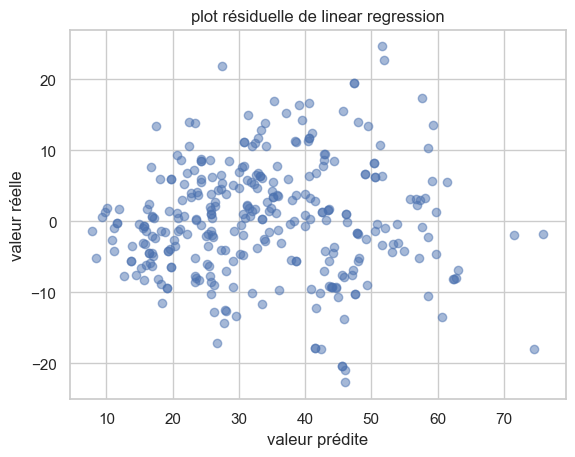

In [27]:
plt.scatter(y_pred_lin_reg, y_test - y_pred_lin_reg, alpha=0.5)
plt.xlabel("valeur prédite")
plt.ylabel("valeur réelle")
plt.title("plot résiduelle de linear regression")
plt.show()

Cette courbe de nuage represente la déviation de chaque valeur prédite par chaque valeur réelle

 oú chaque valeur sur l'axe de 0 signifie une prédiction parfaite(ou près de parfaite) et tous distance entre les autres valeurs jusqu'au 0 correspond à l'imprécision 

# Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train_sc, y_train)
y_pred_ridge = ridge_reg.predict(x_test_sc)

In [29]:
ridge_reg_intercept = ridge_reg.intercept_
ridge_reg_coef = ridge_reg.coef_
ridge_reg_mae = mean_absolute_error(y_test, y_pred_ridge) # distance absolue entre valeur prédite et la valeur réelle : le plus bas est le plus meilleur
ridge_reg_r2 = r2_score(y_test, y_pred_ridge) # variance de target par rapport au variable à predire : le plus haut est le meilleur (entre 0 et 1)
ridge_reg_mse = mean_squared_error(y_test,y_pred_ridge) # distance carrée entre valeur prédite et la valeur réelle : le plus bas est le plus meilleur
ridge_reg_rmse = math.sqrt(ridge_reg_mse)

In [30]:
print("Root Mean Squared Error:", ridge_reg_mse)
print("Mean Absolute Error:", ridge_reg_mae)
print("R2 Score:", ridge_reg_r2)
print("Mean Squared Error : ",ridge_reg_mse)
print("coefficients optimales: ",ridge_reg_coef)
print("regression intercept: ",ridge_reg_intercept)

Root Mean Squared Error: 64.03914417114511
Mean Absolute Error: 6.245890162427472
R2 Score: 0.7499491471821822
Mean Squared Error :  64.03914417114511
coefficients optimales:  [10.01563872  6.2467725   3.03241055 -4.56267485  0.90962469 -1.09889704
 -0.6460736   8.9767497 ]
regression intercept:  33.90078222692088


Text(0.5, 1.0, "Prédiction du modèle 'Ridge regression'")

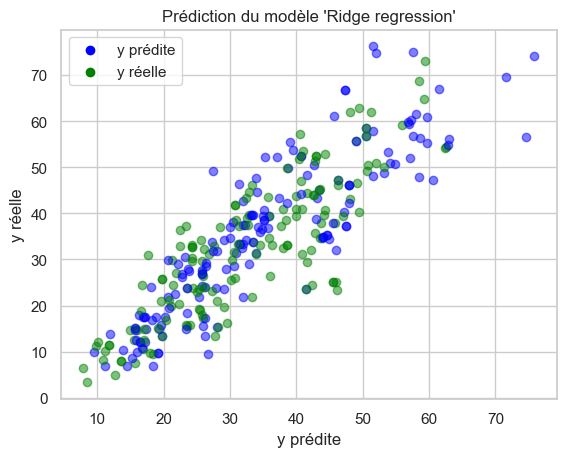

In [31]:
colors = ['blue', 'green'] * (len(y_test) // 2 + 1)
for i in range(len(y_test)):
    plt.scatter(y_pred_ridge[i], y_test[i], color=colors[i], alpha=0.5)
plt.scatter([], [], color='blue', label='y prédite')
plt.scatter([], [], color='green', label='y réelle')
plt.legend()
plt.xlabel('y prédite')
plt.ylabel('y réelle')
plt.title("Prédiction du modèle 'Ridge regression'")

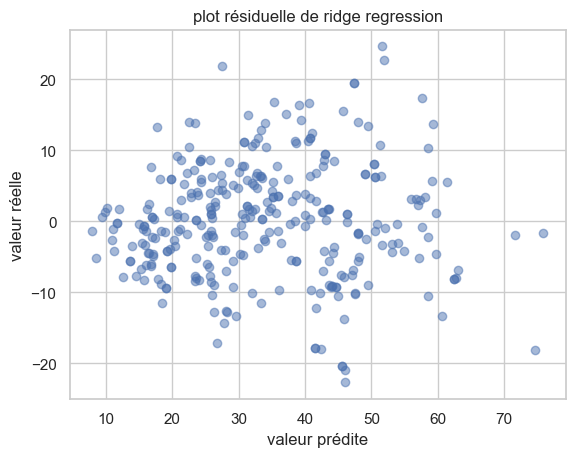

In [32]:
plt.scatter(y_pred_ridge, y_test - y_pred_ridge, alpha=0.5)
plt.xlabel("valeur prédite")
plt.ylabel("valeur réelle")
plt.title("plot résiduelle de ridge regression")
plt.show()

Les deux modèles Ridge regression et Linear regression donnent presque les memes resultats lors d'evaluation, donc on doit chercher un modèle adapté à cette problème

In [33]:
from sklearn.neighbors import KNeighborsRegressor  # For KNN regression
from sklearn.svm import SVR                       # For Support Vector Regression
from sklearn.linear_model import LinearRegression # For Linear Regression
from sklearn.tree import DecisionTreeRegressor    # For Decision Tree Regression
from sklearn.ensemble import GradientBoostingRegressor  # For Gradient Boosting
from sklearn.ensemble import AdaBoostRegressor          # For AdaBoost Regression
from sklearn.ensemble import RandomForestRegressor      # For Random Forest Regression
from xgboost import XGBRegressor

knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor() 
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train_sc,y_train)
    print(model)
    pre=model.predict(x_test_sc)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')

result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

***************** KNeighborsRegressor *******************


KNeighborsRegressor()


R2score  - 0.8410903789931896


cross_val_score  - 0.7634963691239515


rmse_score  - 6.3794565752901065


***************** SVR *******************


SVR()


R2score  - 0.7768667470786127


cross_val_score  - 0.24641630167699197


rmse_score  - 7.559459384707929


***************** LinearRegression *******************


LinearRegression()


R2score  - 0.7498842229057932


cross_val_score  - 0.7486415426263343


rmse_score  - 8.003484964022137


***************** DecisionTreeRegressor *******************


DecisionTreeRegressor()


R2score  - 0.9734938410074099


cross_val_score  - 0.9670972769231252


rmse_score  - 2.605445474863079


***************** GradientBoostingRegressor *******************


GradientBoostingRegressor()


R2score  - 0.9295485806297662


cross_val_score  - 0.9245708739633628


rmse_score  - 4.247696349114983


***************** AdaBoostRegressor *******************


AdaBoostRegr

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,84.109038,6.379457,76.349637
1,SVR,77.686675,7.559459,24.641630
2,LinearRegression,74.988422,8.003485,74.864154
3,DecisionTreeRegressor,97.349384,2.605445,96.709728
4,GradientBoostingRegressor,92.954858,4.247696,92.457087
5,AdaBoostRegressor,80.960787,6.982856,79.983668
6,RandomForestRegressor,97.440953,2.560046,97.028591
7,XGBRegressor,98.454492,1.989501,97.756668


## Backward elimination 

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [35]:
x_train_sc.shape

(1255, 8)

In [36]:
bakward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
                                                    k_features=(1,9),
                                                    forward=False,
                                                    floating=False,
                                                    verbose=2,
                                                    scoring= "accuracy",
                                                    cv= 5).fit(x_train_sc, y_train)

AttributeError: k_features tuple max value must be between 1 and X.shape[1].

In [ ]:
x_train_sc = np.append(arr=np.ones((x_train_sc.shape[0],1)), values= x_train_sc, axis=1)
x_test_sc = np.append(arr=np.ones((x_test_sc.shape[0], 1)), values=x_test_sc, axis=1)

np.insert(x_columns,0,"Constant")

Index(['Constant', 'Ciment', 'Laitier', 'cendre volante', 'Eau',
       'Superplastifiant', 'Gravier', 'Sable', 'Age'],
      dtype='object')

On ajoute la colonne qui represente le coefficient fixe

In [ ]:
x_train_sc.shape
x_test_sc.shape

(314, 9)

In [ ]:
x_opt=x_train_sc [:, [0, 1, 2, 3, 4, 8]]
x_train_sc_opt = x_train_sc [:, [0, 1, 2, 3, 4, 8]]
x_test_sc_opt = x_test_sc[:, [0, 1, 2, 3, 4, 8]]
regressor_OLS = sm.OLS(endog=y_train,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     811.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:13:25   Log-Likelihood:                -4350.1
No. Observations:                1255   AIC:                             8712.
Df Residuals:                    1249   BIC:                             8743.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9008      0.219    154.661      0.000      33.471      34.331
x1            11.1289      0.270     41.209      0.000      10.599      11.659
x2             7.5515      0.262     28.848      0.000       7.038       8.065
x3             4.3908      0.280     15.696      0.000       3.842       4.940
x4            -4.4069      0.232    -19.016      0.000      -4.862      -3.952
x5             8.9887      0.221     40.755      0.000       8.556       9.421
==============================================================================
Omnibus:                       16.590   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.757
Skew:                           0.198   Prob(JB):                     5.13e-05
Kurtosis:                       3.470   Cond. No.                         2.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#x_columns = np.concatenate(x_columns[0:4],x_columns[8],axis=1)
x_columns[0:5]

Index(['Ciment', 'Laitier', 'cendre volante', 'Eau', 'Superplastifiant'], dtype='object')

on trouve plusieurs p_value == 0, donc on essai avec chaqu'un un modèle pour qu'on puisse déterminer lequel est le plus important

Standardisation de bases de train et test pour ne pas dépasser la capacité de calcul de la machine

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train_sc_opt,y_train)
regressor.intercept_
y_pred_backward_elimination = regressor.predict(x_test_sc_opt)

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
reg_coef = regressor.coef_
reg_intercept = regressor.intercept_
rmse_linear_reg = rmse(y_test, y_pred_backward_elimination)
mae_linear_reg = mean_absolute_error(y_test, y_pred_backward_elimination) # distance absolue entre valeur prédite et la valeur réelle : le plus bas est le plus meilleur
r2_linear_reg = r2_score(y_test, y_pred_backward_elimination) # variance de target par rapport au variable à predire : le plus haut est le meilleur (entre 0 et 1)
mse_linear_reg = mean_squared_error(y_test,y_pred_backward_elimination) # distance carrée entre valeur prédite et la valeur réelle : le plus bas est le plus meilleur

In [ ]:
print("Root Mean Squared Error:", rmse_linear_reg)
print("Mean Absolute Error:", mae_linear_reg)
print("R2 Score:", r2_linear_reg)
print("Mean Squared Error : ",mse_linear_reg)
print("regression coefficient: ",reg_coef)
print("regression intercept: ",reg_intercept)

Root Mean Squared Error: 8.08756120078595
Mean Absolute Error: 6.3858572235491495
R2 Score: 0.7446017124405642
Mean Squared Error :  65.40864617645828
regression coefficient:  [ 0.         11.12893592  7.55145486  4.39075729 -4.40693322  8.98873664]
regression intercept:  33.9007822269209
